<a href="https://colab.research.google.com/github/NarciSource/Aivle--MiniProject-5-2/blob/main/2.%EA%B8%B0%EB%B3%B8%20%EB%AA%A8%EB%8D%B8%EB%A7%81_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 함수 생성

In [ ]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aivle/mp5/data01_train.csv').drop('subject',axis=1)
test = pd.read_csv('/content/drive/MyDrive/aivle/mp5/data01_test.csv').drop('subject',axis=1)

#### 2) 기본 정보 조회

In [ ]:
data.shape

(5881, 562)

In [ ]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [ ]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다.


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [ ]:
target = "Activity"
x = data.drop(target, axis=1)
y = data[target]

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_x = scaler.fit_transform(x)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(scale_x, y, train_size=.8, random_state=2023, stratify=y)

In [ ]:
test_x = test.drop(target, axis=1)
test_y = test[target]

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다.
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

### (1) 알고리즘1 :

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(train_x, train_y)

pred_y = model_rf.predict(valid_x)
print(classification_report(valid_y, pred_y))
print(accuracy_score(valid_y, pred_y))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       1.00      0.98      0.99       206
          STANDING       0.98      1.00      0.99       218
           WALKING       0.99      0.99      0.99       200
WALKING_DOWNSTAIRS       0.98      0.97      0.97       158
  WALKING_UPSTAIRS       0.98      0.99      0.99       172

          accuracy                           0.99      1177
         macro avg       0.99      0.99      0.99      1177
      weighted avg       0.99      0.99      0.99      1177

0.9881053525913339


In [ ]:
pred_y = model_rf.predict(scaler.transform(test_x))
print(classification_report(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       292
           SITTING       0.92      0.96      0.94       254
          STANDING       0.96      0.94      0.95       287
           WALKING       0.99      0.98      0.99       228
WALKING_DOWNSTAIRS       0.99      0.98      0.99       195
  WALKING_UPSTAIRS       0.98      1.00      0.99       215

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471

0.973487423521414


### (2) 알고리즘2 :

In [ ]:
from xgboost import XGBClassifier
model_xgb = RandomForestClassifier()
model_xgb.fit(train_x, train_y)

pred_y = model_xgb.predict(scaler.transform(test_x))
print(classification_report(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       292
           SITTING       0.95      0.96      0.95       254
          STANDING       0.96      0.96      0.96       287
           WALKING       0.99      0.98      0.99       228
WALKING_DOWNSTAIRS       0.99      0.98      0.99       195
  WALKING_UPSTAIRS       0.98      1.00      0.99       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

0.9775662814411965


### (3) 알고리즘3 :

In [ ]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier()
model_sgd.fit(train_x, train_y)

pred_y = model_sgd.predict(scaler.transform(test_x))
print(classification_report(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       292
           SITTING       0.97      0.93      0.95       254
          STANDING       0.94      0.97      0.95       287
           WALKING       0.98      1.00      0.99       228
WALKING_DOWNSTAIRS       0.99      0.97      0.98       195
  WALKING_UPSTAIRS       0.99      1.00      0.99       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

0.9768864717878993


In [ ]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier()
model_mlp.fit(train_x, train_y)

pred_y = model_mlp.predict(scaler.transform(test_x))
print(classification_report(test_y, pred_y))
print(accuracy_score(test_y, pred_y))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       292
           SITTING       0.96      0.96      0.96       254
          STANDING       0.96      0.96      0.96       287
           WALKING       1.00      1.00      1.00       228
WALKING_DOWNSTAIRS       0.99      1.00      0.99       195
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471

0.9830047586675731


### (4) 알고리즘4 :

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
encoder.fit(train_y)

LabelEncoder()

In [ ]:
encoder.transform(train_y)

array([0, 3, 0, ..., 3, 3, 4])

In [ ]:
import tensorflow as tf

il = tf.keras.layers.Input(shape=train_x.shape[1:])
hl = tf.keras.layers.Dense(64, activation='relu')(il)
hl = tf.keras.layers.Dense(32, activation='relu')(hl)
hl = tf.keras.layers.Dense(16, activation='relu')(hl)
ol = tf.keras.layers.Dense(6, activation='softmax')(hl)

model_dl = tf.keras.Model(il, ol)
model_dl.summary()

model_dl.compile(optimizer='Adam',
                 loss=tf.keras.metrics.sparse_categorical_crossentropy,
                 metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 561)]             0         
                                                                 
 dense (Dense)               (None, 64)                35968     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 6)                 102       
                                                                 
Total params: 38678 (151.09 KB)
Trainable params: 38678 (151.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_dl.fit(train_x, encoder.transform(train_y),
                       validation_data=(valid_x, encoder.transform(valid_y)),
                       callbacks=[es],
                       epochs=100)

Epoch 1/100
147/147 [==============================] - 2s 6ms/step - loss: 0.7026 - accuracy: 0.7409 - val_loss: 0.3485 - val_accuracy: 0.8573
Epoch 2/100
147/147 [==============================] - 1s 4ms/step - loss: 0.2889 - accuracy: 0.8888 - val_loss: 0.2475 - val_accuracy: 0.9091
Epoch 3/100
147/147 [==============================] - 1s 6ms/step - loss: 0.1929 - accuracy: 0.9279 - val_loss: 0.1543 - val_accuracy: 0.9465
Epoch 4/100
147/147 [==============================] - 1s 9ms/step - loss: 0.1565 - accuracy: 0.9428 - val_loss: 0.1260 - val_accuracy: 0.9626
Epoch 5/100
147/147 [==============================] - 1s 8ms/step - loss: 0.1292 - accuracy: 0.9520 - val_loss: 0.1033 - val_accuracy: 0.9720
Epoch 6/100
147/147 [==============================] - 1s 5ms/step - loss: 0.1129 - accuracy: 0.9537 - val_loss: 0.1002 - val_accuracy: 0.9669
Epoch 7/100
147/147 [==============================] - 1s 6ms/step - loss: 0.1011 - accuracy: 0.9617 - val_loss: 0.0920 - val_accuracy: 0.9686

In [ ]:
model_dl.evaluate(scaler.transform(test_x), encoder.transform(test_y))

46/46 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9762


[0.06273243576288223, 0.9762066602706909]

## 옵션

옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
상위 N개 변수를 선정하여 모델링 및 성능 비교
모델링에 항상 모든 변수가 필요한 것은 아닙니다.
변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.


In [ ]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.305772,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.622617,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS


In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, train_size=.8, random_state=2023, stratify=y)

In [ ]:
train_x

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
423,0.285367,-0.016935,-0.110594,-0.981254,-0.974275,-0.985248,-0.981633,-0.973829,-0.984997,-0.923326,...,-0.257445,-0.499201,-0.863550,0.128334,-0.507696,0.209908,-0.252509,0.451658,-0.319672,-0.679713
5418,0.203322,-0.060604,-0.067053,0.082891,0.119574,-0.172462,0.102023,0.008659,-0.185203,0.079722,...,0.260825,0.583366,0.367737,0.197565,-0.484942,-0.920431,-0.354097,-0.770500,0.247807,-0.036212
5492,0.295850,-0.013795,-0.107063,-0.945795,-0.970044,-0.988816,-0.947073,-0.970208,-0.988572,-0.891713,...,-0.079397,-0.185536,-0.606278,-0.056560,0.020039,-0.369449,-0.169260,0.888810,-0.443736,-0.505192
4411,0.289340,-0.011843,-0.079018,-0.976719,-0.940158,-0.919838,-0.979956,-0.930538,-0.912390,-0.905634,...,0.139268,-0.322854,-0.696086,0.026767,0.067733,-0.405729,-0.625926,-0.672752,0.272656,0.164698
934,0.185946,-0.011804,-0.036140,-0.008068,-0.095223,-0.113690,-0.122857,-0.158982,-0.143389,0.353499,...,0.055440,-0.462407,-0.815341,0.506709,-0.802412,0.641645,0.027721,-0.699930,0.289239,0.099656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0.356601,-0.015160,-0.092550,-0.492007,-0.286014,-0.189522,-0.486820,-0.317830,-0.231270,-0.504429,...,0.062293,-0.071490,-0.436179,-0.607529,-0.154116,-0.735777,0.078357,-0.681234,0.231966,0.198239
1919,0.271961,-0.019885,-0.069584,-0.961967,-0.888776,-0.884055,-0.973663,-0.913243,-0.884899,-0.837707,...,-0.218202,-0.225573,-0.584807,0.004294,0.148213,-0.055767,0.025825,-0.874982,0.044080,-0.056103
986,0.284791,-0.018216,-0.107082,-0.610066,-0.199870,-0.486822,-0.635666,-0.231927,-0.482827,-0.480682,...,0.042783,0.615024,0.438056,-0.811369,-0.164487,0.050660,-0.788329,-0.857902,0.184294,-0.031542
1743,0.256678,-0.023119,-0.092117,-0.328737,-0.015901,-0.209608,-0.341054,-0.034639,-0.193239,-0.237182,...,0.332804,0.278523,0.002915,0.495154,0.636015,-0.602697,-0.414455,-0.763516,0.137501,0.184010


In [ ]:
feature_importances = plot_feature_importance(model_rf.feature_importances_, train_x.columns, result_only = True)

In [ ]:
feature_importances[:5]

,feature_name,feature_importance
0,tGravityAcc-energy()-X,0.041635
1,tGravityAcc-mean()-X,0.036128
2,"angle(Y,gravityMean)",0.029868
3,tGravityAcc-min()-X,0.029442
4,"angle(X,gravityMean)",0.026376


In [ ]:

model_rf = RandomForestClassifier()
model_rf.fit(train_x, train_y)

pred_y = model_rf.predict(valid_x)
print(classification_report(valid_y, pred_y))
print(accuracy_score(valid_y, pred_y))

In [ ]:
def find_score(feature_name,):
    cutted_train_x = train_x.loc[:, feature_name]
    cutted_valid_x = valid_x.loc[:, feature_name]

    model_rf.fit(cutted_train_x, train_y)
    return model_rf.score(cutted_valid_x, valid_y)

In [ ]:
feature_importances.shape

(561, 2)

In [ ]:
scores = list(map(lambda i: find_score(feature_importances[:i]['feature_name']), range(500, 0, -50)))

In [ ]:
df_scores = pd.DataFrame({
    'feature_nums': list(range(500, 0, -50)),
    'scores': scores,
})
df_scores

,feature_nums,scores
0,500,0.983857
1,450,0.984707
2,400,0.985556
3,350,0.988105
4,300,0.983857
5,250,0.988955
6,200,0.983857
7,150,0.988105
8,100,0.984707
9,50,0.986406


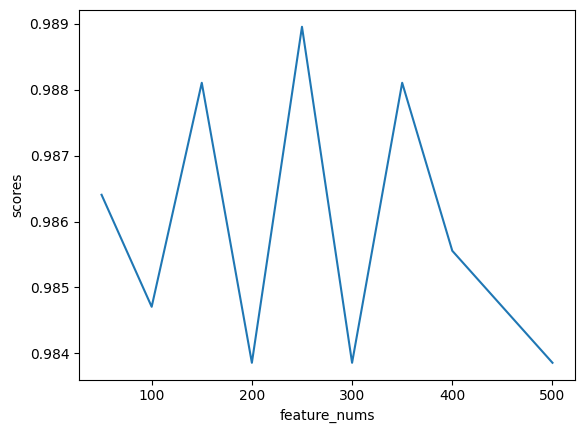

In [ ]:
sns.lineplot(data=df_scores, x='feature_nums', y='scores')
plt.show()